In [1]:
ones(2,3)

2×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [2]:
A = fill(0., 2,3)

2×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [3]:
reshape(1:10, 2, 5)

2×5 reshape(::UnitRange{Int64}, 2, 5) with eltype Int64:
 1  3  5  7   9
 2  4  6  8  10

In [4]:
i_2 = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [5]:
shear = [1 3;0 1]

2×2 Array{Int64,2}:
 1  3
 0  1

In [6]:
shear * i_2

2×2 Array{Int64,2}:
 1  3
 0  1

## Self Exercise

Write LU factorization. Check the speed versus computing the inverse for different sizes of Ax=b.

## 4.8 Difference equations

Write a bunch of linear difference equations, picture the images

* There is a bit wrong in my function: the first coefficient is always 1; an nth order difference equation describes the relationship between the signal at k=n and the n previous values.

In [7]:
2 .^ (1:5)

5-element Array{Int64,1}:
  2
  4
  8
 16
 32

In [8]:
using Plots

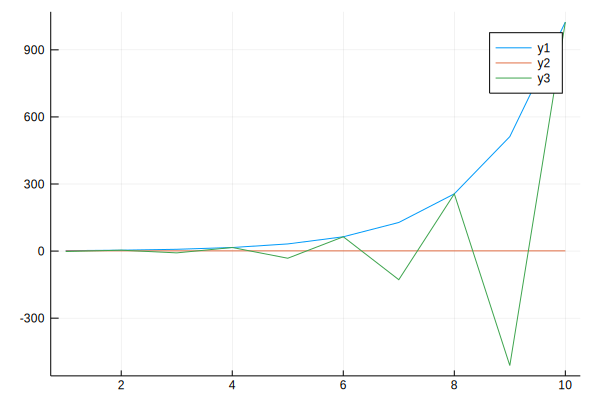

In [9]:
x = 1:10
y1 = 2 .^ x
y2 = 1 .^ x
y3 = (-2) .^ x

plot(x, [y1, y2, y3])

In [10]:
using LinearAlgebra

"""
Compute a difference equation on a discrete signal

Coefficients must be given k...k+n
"""
function diffequation(y, coefs)

    result :: Array{Float64} = []
    order = length(coefs) - 1
        
    
    for i in order + 1 :length(y)
        
        z = dot(coefs, y[i-order:i])
                
        push!(result, z)
    end
    return result
end

coefs = [4, -4, 1, 1]
diffequation(5:15, coefs)

8-element Array{Float64,1}:
 11.0
 13.0
 15.0
 17.0
 19.0
 21.0
 23.0
 25.0

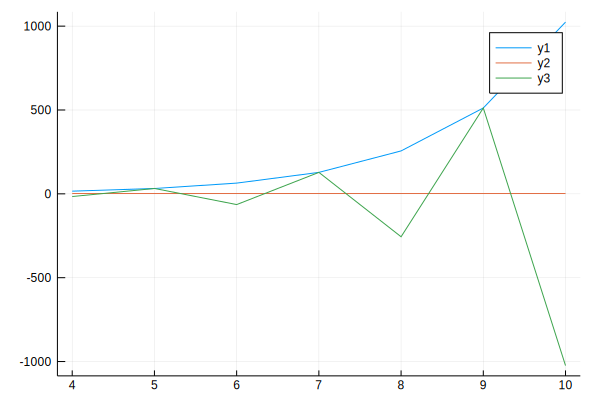

In [11]:
k = 1:10
y1 = 2 .^ k
y2 = 1 .^ k
y3 = (-2) .^ k

x =  diffequation(k, [0,0,0,1])
z1 = diffequation(y1, coefs)
z2 = diffequation(y2, coefs)
z3 = diffequation(y3, coefs)
plot(x, [z1, z2, z3])

In [12]:
cos(pi)

-1.0

### A more interesting signal: cosine

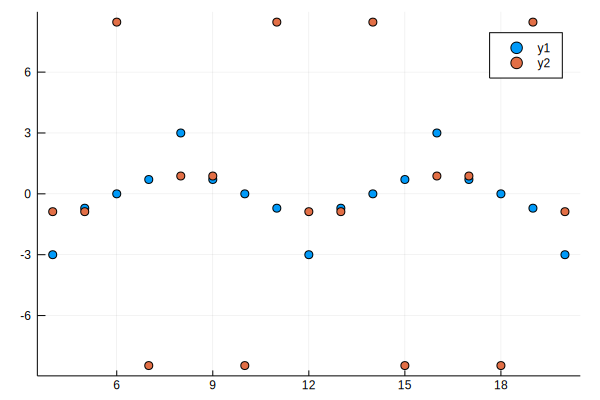

In [13]:
k = 1:20
y1 = map(x -> 2cos(pi*x/4) + cos(3pi * x/4), k)

x =  diffequation(k, [0,0,0,1])
z1 = diffequation(y1, coefs)

scatter(x, [diffequation(y1, [0,0,0,1]), z1])

# Eigenvalues and eigenvectors

Explore linear transformations and their eigenvectors.

In [14]:
function random2Dtransform()
    A = rand(-9:9, 2,2)
    A = A / sum(A)
    return A
end

A = random2Dtransform()
X = reshape([-1,1,1,1,-1,-1,1,-1],(2, 4))

2×4 Array{Int64,2}:
 -1  1  -1   1
  1  1  -1  -1

In [15]:
using Plots

In [16]:
AX

UndefVarError: UndefVarError: AX not defined

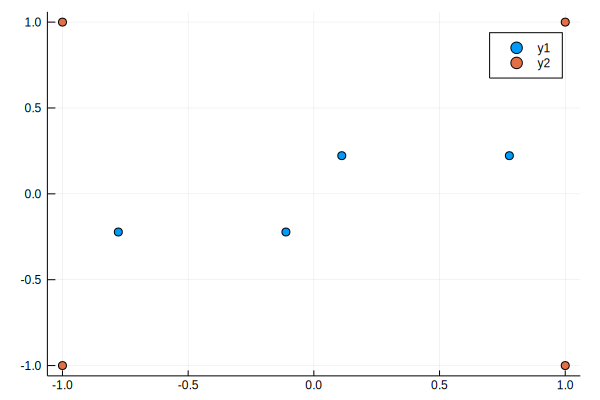

In [17]:
AX = A * X

p = scatter(AX[1, :], AX[2, :])
scatter!(p, X[1, :], X[2, :])

In [18]:
X

2×4 Array{Int64,2}:
 -1  1  -1   1
  1  1  -1  -1

In [19]:
AX

2×4 Array{Float64,2}:
 -0.111111  0.777778  -0.777778  0.111111
 -0.222222  0.222222  -0.222222  0.222222

In [20]:
function drawlineartransform(A, X=reshape([0,1,1,1,0,0,1,0],(2, 4)), lines=false)
    @show A
    input = X
    transformed = A * input
    maxx = 0
    maxy = 0
    p = scatter(legend=false)

    # Each partition represents the x and y pairs of a single
    # original point and its transformed
    for (x, y) in Iterators.partition(zip(input, transformed),2)

        # collect because stupid plots doesn't take draw tuples
        xvalues = collect(x)
        yvalues = collect(y)
        
        maxx = maximum((vcat(map(abs, xvalues), maxx)))
        maxy = maximum((vcat(map(abs, yvalues), maxy)))
        
        scatter!(xvalues, yvalues) 
        
        # Line from the origin. TODO: same color as dots
        if lines
            plot!(vcat(0,xvalues), vcat(0,yvalues))
        end
    end

    maxx+=2
    maxy+=2
    
    scatter!(xlims=(-maxx,maxx), ylims=(-maxy,maxy)) 
    return p
end

drawlineartransform (generic function with 3 methods)

A = [0.444444 0.333333; 0.222222 0.0]


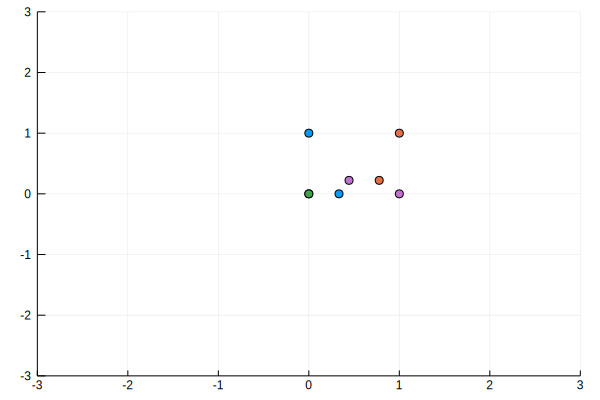

In [21]:
drawlineartransform(A)

A = [0.444444 0.333333; 0.222222 0.0]


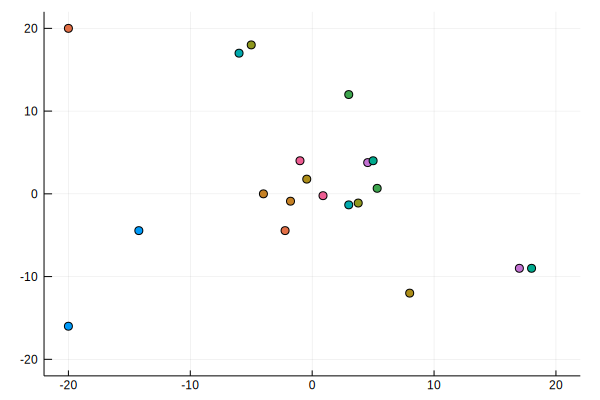

In [22]:
drawlineartransform(A, reshape(rand(-20:20, 20), (2,10)))

In [23]:
function random2Dpoints(n=20, range=-20:20)
    return reshape(rand(range, 2n), (2,n))
end

random2Dpoints (generic function with 3 methods)

In [24]:
random2Dpoints()

2×20 Array{Int64,2}:
 -4  17    3   19  -17  -7  -1  20  15  …  -3  -11   -4  15   20  17   12  -3
  0   1  -13  -14    3  19   0  15  -6     19    9  -15  16  -13  -7  -20  -3

In [25]:
function random2Dsymmetric()
    result = random2Dtransform()
    result[2,1] = result[1,2]
    
    return result
end
    

random2Dsymmetric (generic function with 1 method)

In [26]:
function unitcircle(n=20)
    range(0, 2pi, length=n) |> 
        angles -> map(v->[sin(v), cos(v)], angles) |> 
        points -> hcat(points...)
end

unitcircle (generic function with 2 methods)

In [27]:
unitcircle()

2×20 Array{Float64,2}:
 0.0  0.324699  0.614213  0.837166  …  -0.614213  -0.324699  -2.44929e-16
 1.0  0.945817  0.789141  0.546948      0.789141   0.945817   1.0        

A = [-0.230769 0.384615; 0.153846 0.692308]


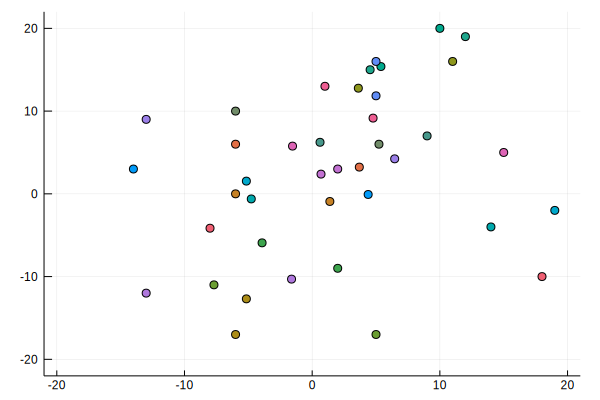

In [28]:
drawlineartransform(random2Dtransform(), random2Dpoints())

A = [0.28 0.04; 0.36 0.32]


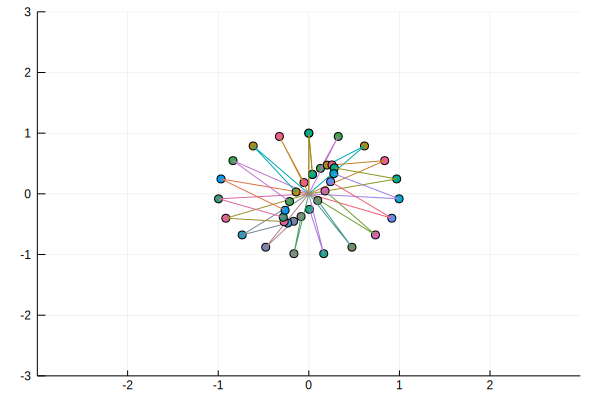

In [29]:
drawlineartransform(random2Dtransform(), unitcircle(), true)

A = [0.6 -0.0666667; -0.0 0.466667]


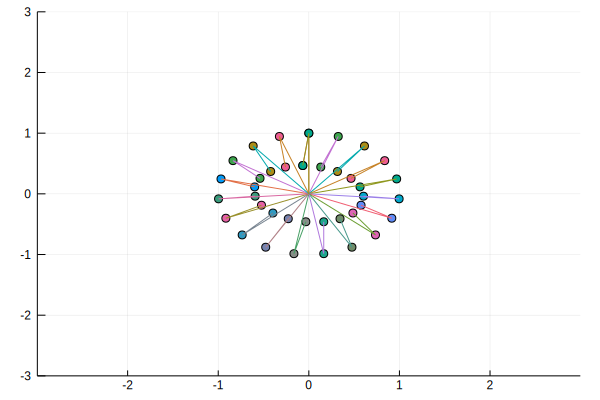

In [30]:
drawlineartransform([0.6 -0.0666667; -0.0 0.466667], unitcircle(), true)

### Future exercise: animate

Interpolation seems nontrivial, so maybe just do it in 3D and animate the view angle

### Exercise: compute eigenvectors, plot

### Exercise: symmetric matrices

A = [2.0 7.0; 7.0 -7.0]


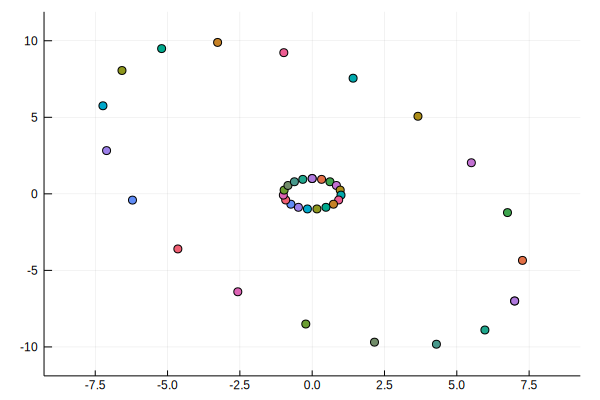

In [31]:
drawlineartransform(random2Dsymmetric(), unitcircle())

A = [0.857143 1.28571; 1.28571 -0.285714]


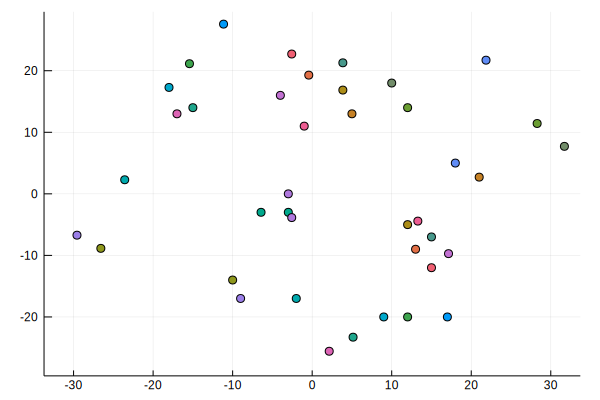

In [32]:
drawlineartransform(random2Dsymmetric(), random2Dpoints(20))

#### Exercises 5.6


In [33]:
#3

A = [.5 .4; -.2 1.1]

vals, vectors = eigen(A)
vals, vectors

([0.7, 0.9], [-0.894427 -0.707107; -0.447214 -0.707107])

In [34]:
#5

A = [.4 .3; -.325 1.2]

vals, vectors = eigen(A)
vals, vectors

([0.55, 1.05], [-0.894427 -0.419058; -0.447214 -0.907959])

## SVD

#### ex 7.4.9

MAL

In [45]:
A = [7 1; 0 0; 5 5]
U = [15/√5 5/√5; 0 0; 15/√5 -5/√5]
Sigma = [3*√10 0; 0 √10; 0 0]
V = [2/√5 1/√5; 1/√5 -2/√5]

2×2 Array{Float64,2}:
 0.894427   0.447214
 0.447214  -0.894427

In [46]:
U*Sigma*transpose(V)

DimensionMismatch: DimensionMismatch("A has dimensions (3,2) but B has dimensions (3,2)")

### Drawing vector fields 

For later reference

https://stackoverflow.com/questions/51466537/how-to-plot-a-vector-field-in-julia

https://discourse.julialang.org/t/anyone-have-a-plots-quiver-example/1369/2